<a href="https://colab.research.google.com/github/leingang/Data-Science-For-Beginners/blob/main/1-Introduction/04-stats-and-probability/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/leingang/Data-Science-For-Beginners/main/data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [5]:
df.aggregate(['mean',np.var]).transpose()

,mean,var
AGE,48.518100,171.846610
SEX,1.468326,0.249561
BMI,26.375792,19.519798
BP,94.647014,191.304401
S1,189.140271,1197.717241
S2,115.439140,924.955494
S3,49.788462,167.293585
S4,4.070249,1.665261
S5,4.641411,0.272892
S6,91.260181,132.165712


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


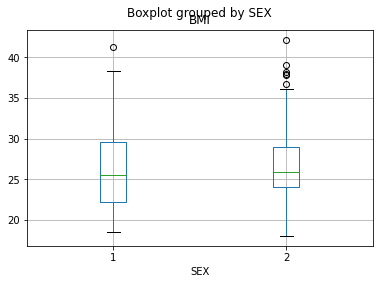

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


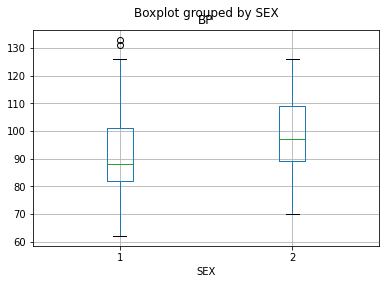

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


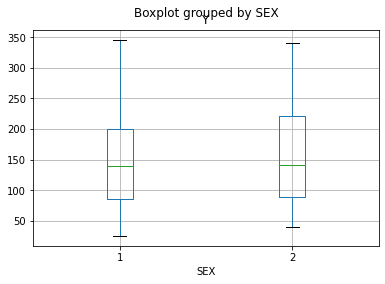

In [14]:
for col in ['BMI','BP','Y']:
  df.boxplot(column=col,by='SEX')
  plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ca72dcf10>]],
      dtype=object)

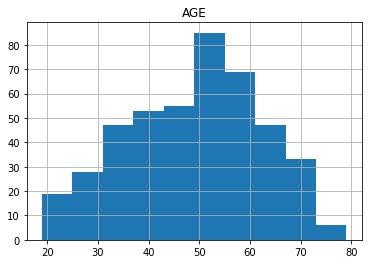

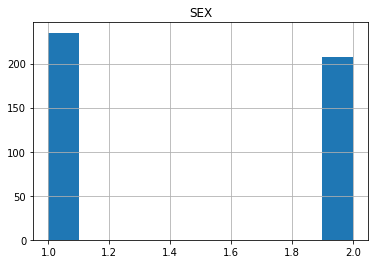

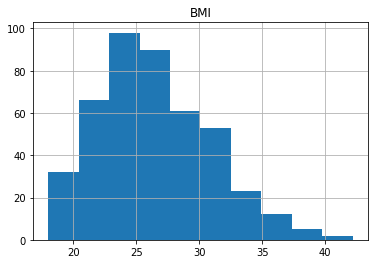

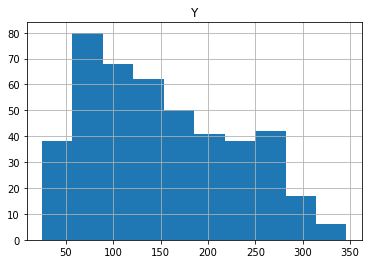

In [19]:
df.hist('AGE')
df.hist('SEX')
df.hist('BMI')
df.hist('Y')

Sex is close to uniformly distributed, but the rest look more normal.

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [42]:
pd.DataFrame(np.corrcoef(df,rowvar=False),
             index=df.columns,
             columns=df.columns).sort_values('Y',ascending=False)['Y']

Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64

The BMI, S5, BP, and S4 variables have the highest correlation with Y. Sex is not correlated with Y. Notice S3 is *negatively* correlated with Y.

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

We'll use the t-test.

In [44]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']],
                       df.loc[df['SEX']==2,['Y']],
                       equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975


There's no significant difference.